 # Algoritmo di Metropolis

Sfruttando un algoritmo opportuno di Metropolis in 3D in coordinate cartesiane, si simulino alcuni stati quantistici tipici dell'atomo di idrogeno.

Si utilizzi, infatti, il modulo quadro della funzione d'onda $\Psi$ come funzione di accettazione per l'algoritmo di Metropolis accoppiata a delle proposte di transizione $T(\vec{x}|\vec{y})$  secondo:\
    1. una transizione uniforme di probabilità;\
    2. una transizione normale multivariante ( $\propto N(\mu$,$\sigma)$ );
    
Ci si soffermi in particolare sui seguenti stati:
- lo stato fondamentale; per il quale vale:
$$ \Psi_{1,0,0}(r,\theta,\phi)= \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $$
- il primo stato eccitato $2p$; per il quale vale:
$$ \Psi_{2,1,0}(r,\theta,\phi)= \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) $$

Si stimi quindi la distanza media dall'origine e il relativo errore per ogni configurazione dell'algoritmo e ogni stato. Infine si ipotizzi specificatamente un punto di partenza della simulazione molto lontano dall'origine e si osservi l'andamento della simulazione (magari in una simulazione ridotta).

Per la stima degli errori utilizzare un algoritmo di media a blocchi, stimando l'incertezza come una deviazione standard della media, con i seguenti parametri:
- N= 100 blocchi;
- L= $10^4$ elementi per ogni blocco;
- M= $10^6$ simulazioni totali;

In [1]:

import math


def Media (X, i, z) :              #attenzione: z è la posizione nell'array
    return sum( X[i:z+1] )/(z-i+1)

def Err (X, i, z):                #attenzione z è la posizione nell'array, vale N=(z+1) ovvero (N-1)=z
    if z==i :
        return 0
    return math.sqrt( (Media(X**2,i,z) - Media(X,i,z)**2) / z )


#### - Analisi della autocorrelazione
Si analizza una delle principali debolezze dell'agoritmo di Metropolis: la generazione di configurazioni correlate.

Per questo motivo, prendendo a campione la simulazione per lo stato fondamentale ( $\Psi_{1,0,0}$ ) eseguita con $T(\vec{x}|\vec{y})$ di tipo uniforme, si consideri il primo blocco di $10^4$ elementi e si calcoli l'autocorrelazione tra il primo elemento di tale blocco e i successivi secondo la definizione della funzione:

$$ cov_{[x_i,x_j]} := \langle x_i(t_1)x_j(t_2) \rangle - \langle x_i(t_1) \rangle \langle x_j(t_2) \rangle$$


$$ Ac_{[x_0,x_i]}(\tau) := \frac{cov_{[x,x]}(t,t+\tau)}{\sqrt{cov_{[x,x]}(t,t)}\sqrt{cov_{[x,x]}(t+\tau,t+\tau)}} = \frac{cov_{[x,x]}(t,t+\tau)}{cov_{[x,x]}(t,t)} = \frac{ \langle x(t)x(t+\tau) \rangle - \langle x(t) \rangle \langle x(t+\tau) \rangle }{\sigma^2_x}$$

E quindi essendo $t_{max}=10^4$.

$$Ac(\tau)= \frac{\frac{1}{t_{max}-\tau}\sum^{t_{max}-\tau}_{t'=0}x(t')x(t'+\tau)-\frac{1}{t_{max}-\tau}\sum^{t_{max}-\tau}_{t'=0}x(t')*\frac{1}{t_{max}-\tau}\sum^{t_{max}-\tau}_{t'=0}x(t'+\tau)}{\frac{1}{t_{max}}\sum^{t_{max}}_{t'=0}x^2(t')-(\frac{1}{t_{max}}\sum^{t_{max}}_{t'=0}x(t'))^2}$$


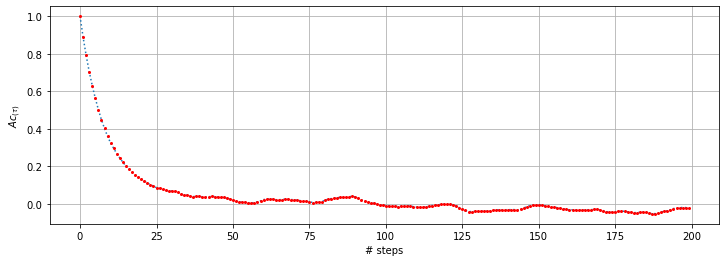

In [2]:

import numpy
import matplotlib.pyplot as plt


X= numpy.loadtxt( "covarianza_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )

tmax= 10000;   
Ac= numpy.zeros( tmax )
A= numpy.zeros( tmax )
B= numpy.zeros( tmax )
C= numpy.zeros( tmax )
D= Media(X**2,0,tmax+1)        
E= Media(X,0,tmax-1)**2    
    
for j in range( tmax ):
    for i in range ( tmax-j ):
        A[j]+= X[i]*X[i+j]
        B[j]+= X[i]
        C[j]+= X[i+j]        
    A[j]/= (tmax-j)
    B[j]/= (tmax-j)
    C[j]/= (tmax-j)
    
for i in range( numpy.size(Ac) ):                      #stima della covarianza
    Ac[i]= ( A[i] - B[i]*C[i] ) / ( D - E )
       
N = numpy.arange ( 200 )   

plt.figure(figsize=(12, 4))
plt.plot( N, Ac[:200], marker= 'o', mfc= 'red', mec= 'red', ms= 2, linestyle= ":")
plt.xlabel('# steps')
plt.ylabel(r'$Ac_{(\tau)}$')
plt.grid(True)

plt.show()


Per una migliore comprensione dell'andamento graficato, si è ristretto lo stesso ai primi 200 steps su un totale di $10^4$.\
Come si può già notare su questa scala la correlazione sui 200 steps è trascurabile, ciò significa che blocchi distanziati da almeno 200 configurazioni simulate sono considerabili scorrelati.

Si considerino a maggior ragione scorrelati gli N blocchi da L elementi che si intende utilizzare nella seguente analisi.

#### - $T(\vec{x}|\vec{y})$  uniforme:

Si importano i 100 blocchi riguardanti lo stato fondamentale $\Psi_{1,0,0}$ per una $T(\vec{x}|\vec{y})$  di tipo uniforme.

In [3]:

R0= numpy.loadtxt( "fondamentale_uniforme_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


Si calcolano i valori medi nei blocchi e i relativi errori e si produce un grafico dell'andamento all'aumentare del numero di blocchi.

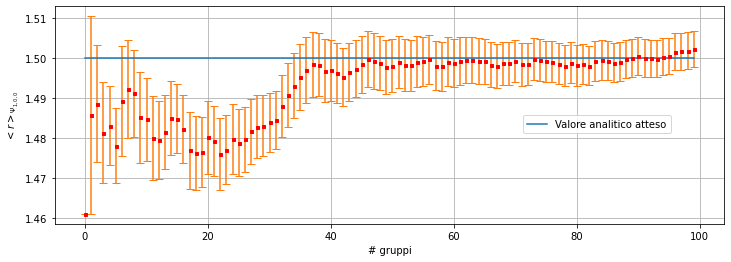

In [4]:

AvR0= numpy.zeros( numpy.size(R0) )
dev_AvR0= numpy.zeros( numpy.size(R0) )

for i in range( numpy.size(R0) ):
    AvR0[i]= Media (R0,0,i)
    dev_AvR0[i]= Err (R0,0,i)
    
N = numpy.arange ( numpy.size(AvR0) )   

plt.figure(figsize=(12, 4))
plt.plot (3/2+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvR0, yerr= dev_AvR0, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$')
#plt.title( "Stato fondamentale" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.5), loc='upper left', borderaxespad=0.)

plt.show()


Analogamente per il primo stato eccitato $\Psi_{2,1,0}$.

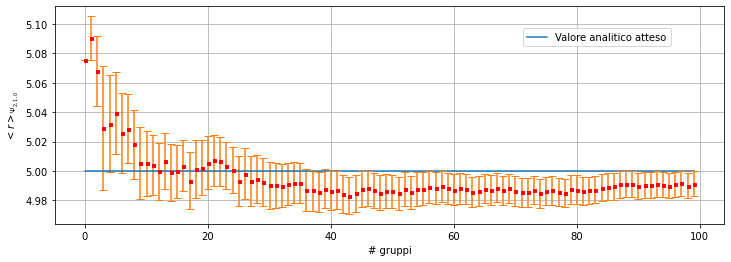

In [5]:

R1= numpy.loadtxt( "1eccitato_uniforme_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )

AvR1= numpy.zeros( numpy.size(R1) )
dev_AvR1= numpy.zeros( numpy.size(R1) )

for i in range( numpy.size(R1) ):
    AvR1[i]= Media (R1,0,i)
    dev_AvR1[i]= Err (R1,0,i)
    
N = numpy.arange ( numpy.size(AvR1) )   

plt.figure(figsize=(12, 4))
plt.plot (5+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvR1, yerr= dev_AvR1, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$')
#plt.title( "Primo stato eccitato" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Come è possibile osservare nei grafici prodotti, la stima del valor medio del raggio atomico si stabilizza nel numero di gruppi, come l'errore ad essa associato.\
Tenendo conto dell'incertezza, inoltre, le stime ottenute risultano compatibili con i valori analitici attesi (riportati nei grafici) anche entro una singola $\sigma$.

Si rammenta che tutta la simulazione è stata prodotta e visualizzata in unità di raggio atomico $a_0$ per semplicità e generalità.

#### - $T(\vec{x}|\vec{y})$  di tipo gaussiano

Per il caso $T(\vec{x}|\vec{y})$  $\propto$ N($\mu$,$\sigma$), nello stato fondamentale $\Psi_{2,1,0}$, si ottiene quanto segue.

In [6]:

R2= numpy.loadtxt( "fondamentale_gauss_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


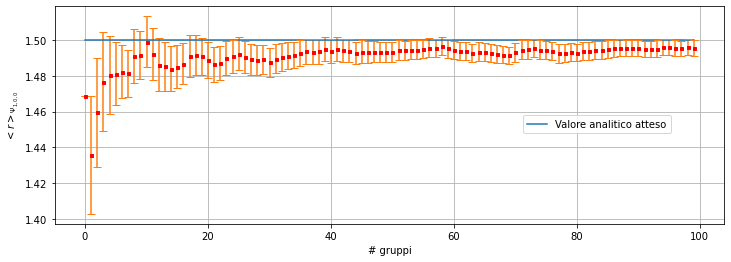

In [7]:

AvR2= numpy.zeros( numpy.size(R2) )
dev_AvR2= numpy.zeros( numpy.size(R2) )

for i in range( numpy.size(R2) ):
    AvR2[i]= Media (R2,0,i)
    dev_AvR2[i]= Err (R2,0,i)
    
N = numpy.arange ( numpy.size(AvR2) )   

plt.figure(figsize=(12, 4))
plt.plot (3/2+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvR2, yerr= dev_AvR2, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$')
#plt.title( "Stato fondamentale" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.5), loc='upper left', borderaxespad=0.)

plt.show()


Analogamente per il primo stato eccitato $\Psi_{2,1,0}$.

In [8]:

R3= numpy.loadtxt( "1eccitato_gauss_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


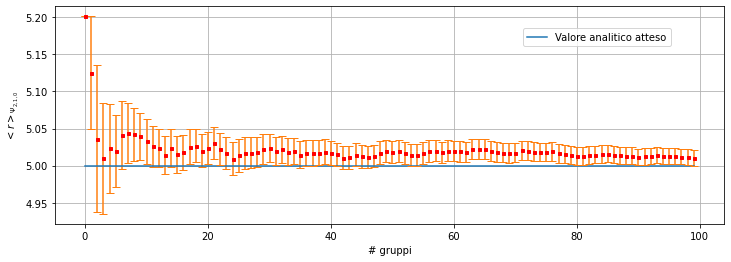

In [9]:

AvR3= numpy.zeros( numpy.size(R3) )
dev_AvR3= numpy.zeros( numpy.size(R3) )

for i in range( numpy.size(R3) ):
    AvR3[i]= Media (R3,0,i)
    dev_AvR3[i]= Err (R3,0,i)
    
N = numpy.arange ( numpy.size(AvR3) )   

plt.figure(figsize=(12, 4))
plt.plot (5+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvR3, yerr= dev_AvR3, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$')
#plt.title( "Primo stato eccitato" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Come in precedenza si può osservare una convergenza dell'osservabile stimata e una progressiva riduzione dell'incertezza associata all'aumentare del numero di gruppi considerati.\
Rispetto all'utilizzo dell'algoritmo di Metropolis con una probabilità di transizione uniforme, la seguente probabilità di tipo gaussiano permette di osservare una convergenza più marcata anche nei primi gruppi, sottolineando una minor varietà di configurazioni esplorate e pertanto una maggiore efficienza.

Infine si sottolineano le modalità secondo cui si sono stabiliti i parametri della funzione gaussiana di transizione.\
Anzitutto non è necessaria una normalizzazione della funzione $T(\vec{x}|\vec{y})$ in quanto essa si semplifica nel calcolo analitico rendendo così potente e versatile l'algoritmo di Metropolis. I parametri $\mu$ e $\sigma$ sono stati, invece, strettamente legati al problema scelto: $\mu$ risulta essere (in tutte le direzioni) la coordinata i-esima di $\vec x$; $\sigma$ è un parametro libero, utilizzato per rendere efficiente l'algoritmo di Metropolis mantenendo un rateo di accettazione intorno al 50% (come da linee guida empiriche riguardo allo sviluppo dell'algoritmo $M(RT)^2$).

#### - Partenza lontano dall'origine

Si consideri lo  stato fondamentale ($\Psi_{1,0,0}$) e una $T(\vec{x}|\vec{y})$  di tipo gaussiano, si osservi cosa succede con una partenza da un punto lontano dall'origine (almeno 10 $a_{0}$ dall'origine).\
Si riduce inoltre il numero totale di configurazioni esaminate a M= $3 x 10^4$ per meglio osservare i primi movimenti dell'algoritmo, mantenendo tuttavia la scorrelazione degli N (=100) blocchi considerati per l'analisi statistica.

In [10]:

R4= numpy.loadtxt( "fondamentale_gauss_lontano_out.txt", usecols= (0), delimiter= "\t", unpack= 'true' )


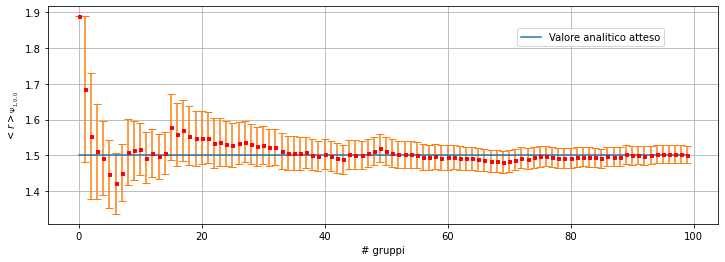

In [11]:

AvR4= numpy.zeros( numpy.size(R4) )
dev_AvR4= numpy.zeros( numpy.size(R4) )

for i in range( numpy.size(R4) ):
    AvR4[i]= Media (R4,0,i)
    dev_AvR4[i]= Err (R4,0,i)
    
N = numpy.arange ( numpy.size(AvR4) )   

plt.figure(figsize=(12, 4))
plt.plot (3/2+numpy.zeros(100), label= "Valore analitico atteso")
plt.errorbar( N, AvR4, yerr= dev_AvR4, capsize= 4, marker= 's', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none")
plt.xlabel('# gruppi')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Idealmente è possibile immaginare un periodo di assestamento iniziale dovuto a tale partenza; questo periodo, ovviamente, sarà influenzato dalla correlazione delle configurazioni generate dal Metropolis, tuttavia ad una distanza di circa 200 configurazioni dalla partenza, (circa un blocco utilizzato per l'analisi statistica) le successive potranno essere considerate scorrelate da quella di partenza e quindi più indicative.\
Inoltre, essendo estremamente lontani in partenza dalle zone più densamente attese, qualsiasi mossa favorevole ad una distanza inferiore verrà ovviamente accettata, così da spingersi quanto più in fretta possibile nei dintorni di 3/2 $a_{0}$.

Dal grafico è quindi osservabile quanto descritto:
- un valor medio della distanza dall'origine del primo blocco (fortemente correlato al suo interno) decisamente lontano dal valore atteso analiticamente; tale stima è, inoltre, decisamente più lontana rispetto ad ogni altra simulazione analizzata;
- un valor medio della prima decina di blocchi fluttuante, con incertezze associate elevate, sopratutto nel raffronto con le precedenti analisi;
- un andamento asintotico all'aumentare del numero di blocchi considerati verso il valore analiticamente atteso, quale proprietà già osservata dall'applicazione di un algoritmo di Metroplis una volta superata la fase di assestamento e giunti in configurazioni più probabili e scorrelate dal luogo di partenza;